# Step-1 : Business Problem Understanding

**How can Zomato improve its market share and customer retention by leveraging restaurant data to identify gaps in service offerings, such as expanding online order availability for popular restaurants, and enhancing the customer experience through personalized recommendations based on ratings, cost, and dining preferences**








In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Step-2 : Data Understanding

In [4]:
df=pd.read_csv("C:\\Users\\Pooja\\Downloads\\Zomato data .csv")
df

,name,online_order,book_table,RATE OUT OF 5,votes,approx_cost(for two people),listed_in(type),rate
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet,4.1
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet,4.1
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet,3.8
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet,3.7
4,Grand Village,No,No,3.8/5,166,600,Buffet,3.8
...,...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining,3.3
144,New Indraprasta,No,No,3.3/5,0,150,Dining,3.3
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining,4.0
146,Darbar,No,No,3.0/5,98,800,Dining,3.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   RATE OUT OF 5                148 non-null    object 
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
 7   rate                         148 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 9.4+ KB


In [6]:
df.columns

Index(['name', 'online_order', 'book_table', 'RATE OUT OF 5', 'votes',
       'approx_cost(for two people)', 'listed_in(type)', 'rate'],
      dtype='object')

In [7]:
df.dtypes

name                            object
online_order                    object
book_table                      object
RATE OUT OF 5                   object
votes                            int64
approx_cost(for two people)      int64
listed_in(type)                 object
rate                           float64
dtype: object

In [8]:
df["name"].value_counts()

name
San Churro Cafe               2
CAFE NOVA                     2
Onesta                        2
Jalsa                         1
Kotian Karavali Restaurant    1
                             ..
Kitchen Garden                1
Hotboxit                      1
Domino's Pizza                1
McDonald's                    1
Vijayalakshmi                 1
Name: count, Length: 145, dtype: int64

In [9]:
df["name"].unique()

array(['Jalsa', 'Spice Elephant', 'San Churro Cafe',
       'Addhuri Udupi Bhojana', 'Grand Village', 'Timepass Dinner',
       'Rosewood International Hotel - Bar & Restaurant', 'Onesta',
       'Penthouse Cafe', 'Smacznego', 'Village Café', 'Cafe Shuffle',
       'The Coffee Shack', 'Caf-Eleven', 'Cafe Vivacity', 'Catch-up-ino',
       "Kirthi's Biryani", 'T3H Cafe', '360 Atoms Restaurant And Cafe',
       'The Vintage Cafe', 'Woodee Pizza', 'Cafe Coffee Day',
       'My Tea House', 'Hide Out Cafe', 'CAFE NOVA', 'Coffee Tindi',
       'Sea Green Cafe', 'Cuppa', "Srinathji's Cafe", 'Redberrys',
       'Foodiction', 'Sweet Truth', 'Ovenstory Pizza', 'Faasos',
       'Behrouz Biryani', 'Fast And Fresh', 'Szechuan Dragon',
       'Empire Restaurant', 'Maruthi Davangere Benne Dosa', 'Chaatimes',
       'Havyaka Mess', "McDonald's", "Domino's Pizza", 'Hotboxit',
       'Kitchen Garden', 'Recipe', 'Beijing Bites', 'Tasty Bytes',
       'Petoo', 'Shree Cool Point', 'Corner House Ice Cream',


In [10]:
df["online_order"].value_counts()

online_order
No     90
Yes    58
Name: count, dtype: int64

In [11]:
df["online_order"].unique()

array(['Yes', 'No'], dtype=object)

In [12]:
df["book_table"].value_counts()

book_table
No     140
Yes      8
Name: count, dtype: int64

In [13]:
df["book_table"].unique()

array(['Yes', 'No'], dtype=object)

In [14]:
df["RATE OUT OF 5"].value_counts()

RATE OUT OF 5
3.8/5     19
3.7/5     15
3.3/5     14
3.4/5     12
4.1/5     11
3.6/5     11
4.0/5     10
3.9/5     10
4.2/5      8
3.1/5      7
2.9/5      7
3.2/5      7
3.5/5      6
3.0/5      2
4.6/5      2
2.8/5      2
4.4/5      2
4.3/5      1
2.6/5      1
3.8 /5     1
Name: count, dtype: int64

In [15]:
df.drop(columns="RATE OUT OF 5",inplace=True)

In [16]:
df["votes"].value_counts()

votes
0       33
28       4
8        4
62       3
17       3
        ..
1647     1
91       1
230      1
415      1
47       1
Name: count, Length: 90, dtype: int64

In [17]:
df["approx_cost(for two people)"].value_counts()

approx_cost(for two people)
300    23
200    16
150    16
400    15
500    14
600    13
800    12
100     6
450     6
250     6
700     5
550     3
750     3
350     3
900     2
850     2
650     2
950     1
Name: count, dtype: int64

In [18]:
df["approx_cost(for two people)"].nunique()

18

In [19]:
df["listed_in(type)"].value_counts()

listed_in(type)
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64

In [20]:
df["listed_in(type)"].unique()

array(['Buffet', 'Cafes', 'other', 'Dining'], dtype=object)

In [21]:
df["rate"].value_counts()

rate
3.8    20
3.7    15
3.3    14
3.4    12
4.1    11
3.6    11
4.0    10
3.9    10
4.2     8
3.1     7
3.2     7
2.9     7
3.5     6
4.6     2
2.8     2
4.4     2
3.0     2
4.3     1
2.6     1
Name: count, dtype: int64

In [22]:
df["rate"].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4])

In [23]:
import pandas as pd

# Define bins and labels for discretization
bins = [0, 3.3, 3.9, 5]  # Adjust bins as needed
labels = ['Low', 'Medium', 'High']

# Apply pd.cut to create a new column with categories
df['rating_category'] = pd.cut(df['rate'], bins=bins, labels=labels, right=False)

# Display the value counts for each category
print(df['rating_category'].value_counts())
df.drop(columns="rate",inplace=True)

rating_category
Medium    78
High      44
Low       26
Name: count, dtype: int64


In [24]:
df.dtypes

name                             object
online_order                     object
book_table                       object
votes                             int64
approx_cost(for two people)       int64
listed_in(type)                  object
rating_category                category
dtype: object

In [25]:
continous=["approx_cost(for two people)","votes"]
discrete_categorical=["name","online_order","book_table","listed_in(type)","rating_category"]


**Exploratory Data Analysis**


**for continous variables**

In [26]:
df[continous].describe()

,approx_cost(for two people),votes
count,148.000000,148.000000
mean,418.243243,264.810811
std,223.085098,653.676951
min,100.000000,0.000000
25%,200.000000,6.750000
50%,400.000000,43.500000
75%,600.000000,221.750000
max,950.000000,4884.000000


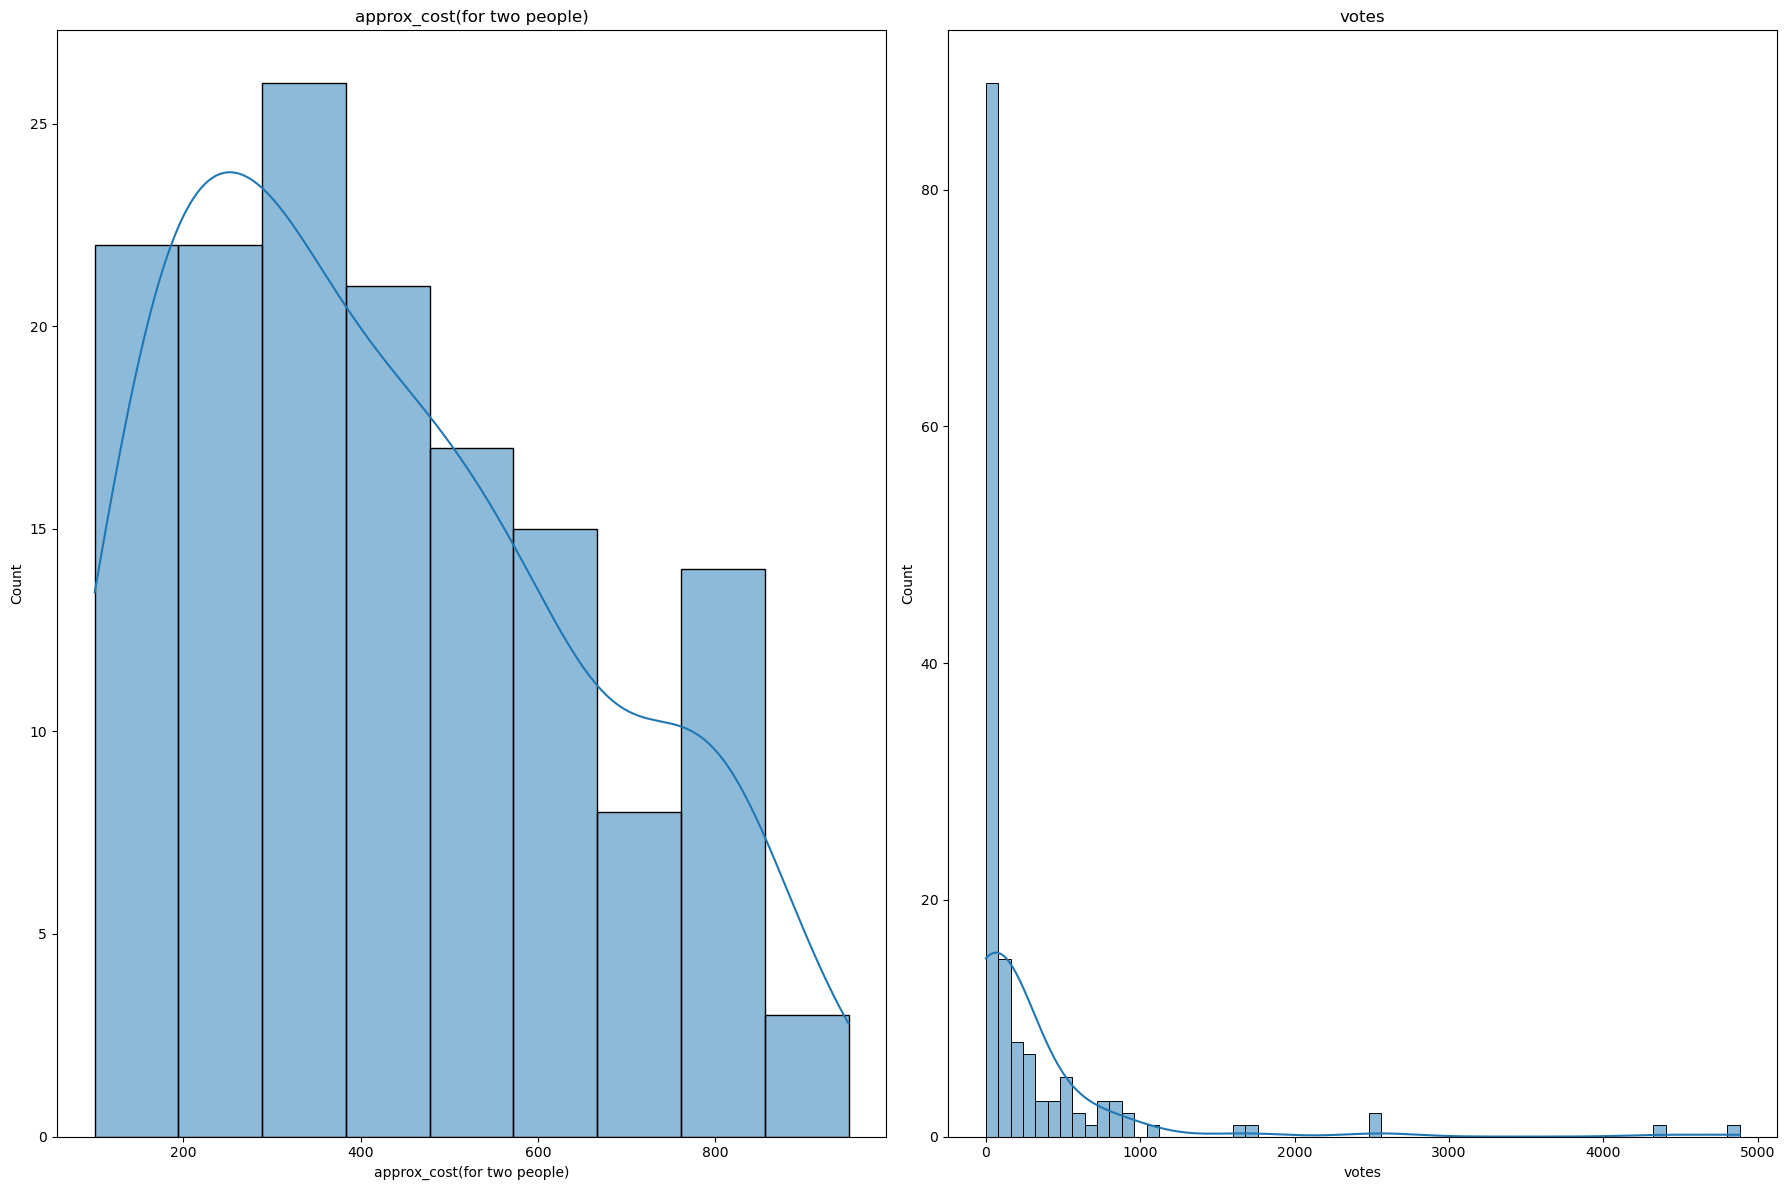

In [27]:
plt.rcParams["figure.figsize"] = (18, 12)

# Create a 3x2 grid for subplots (3 rows, 2 columns)
fig, axes = plt.subplots(1, 2)

# Flatten the axes for easier access
axes = axes.flatten()

# Plot histograms with KDE for each column
sns.histplot(df["approx_cost(for two people)"], kde=True, ax=axes[0])
axes[0].set_title('approx_cost(for two people)')

sns.histplot(df["votes"], kde=True, ax=axes[1])
axes[1].set_title('votes')

# Adjust the layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()



In [28]:
df[continous].skew()

approx_cost(for two people)    0.500294
votes                          4.936310
dtype: float64

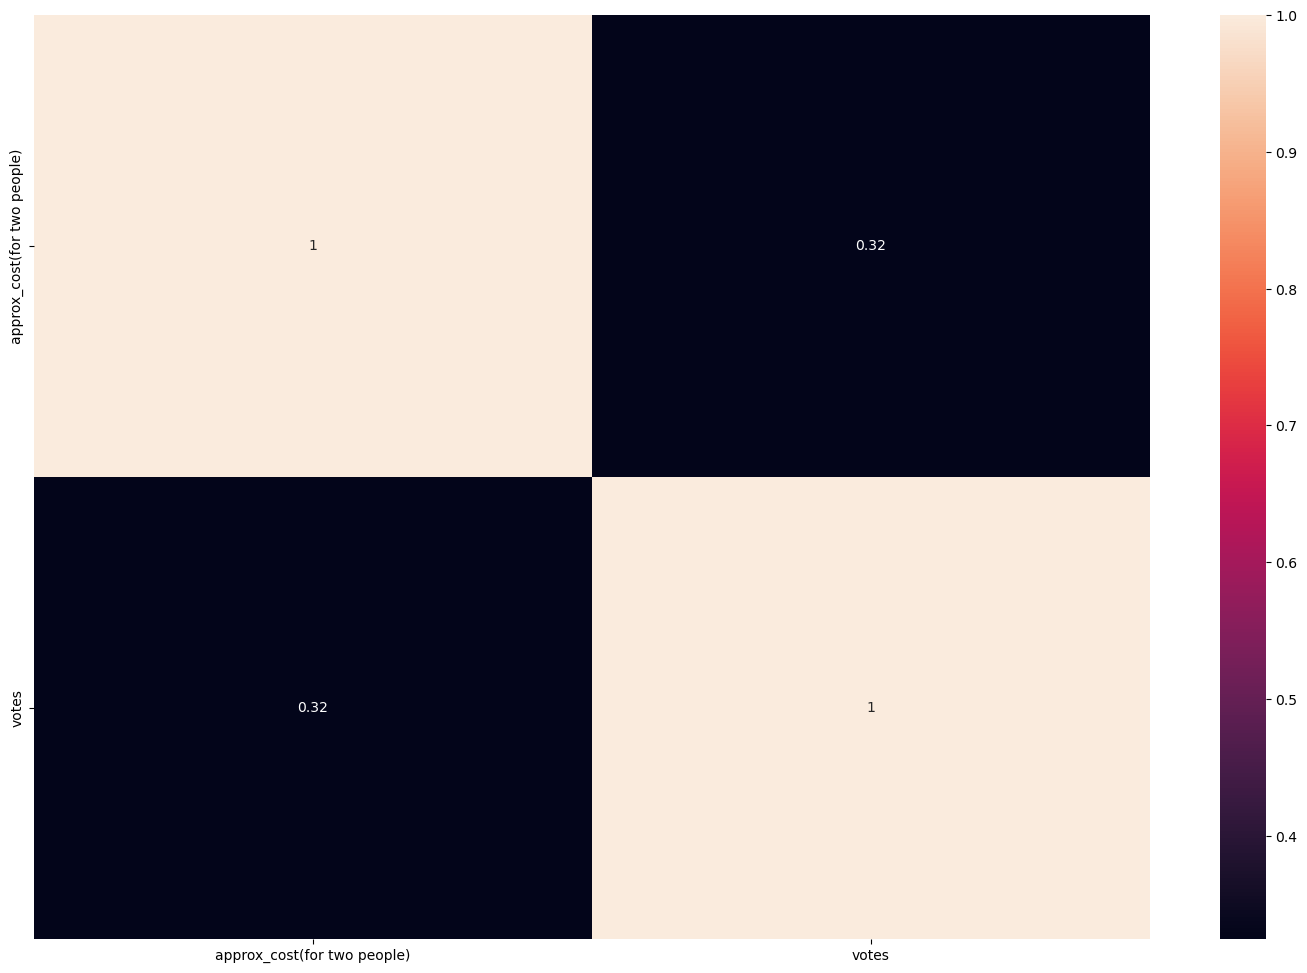

In [29]:
sns.heatmap(df[continous].corr(),annot=True)
plt.show()

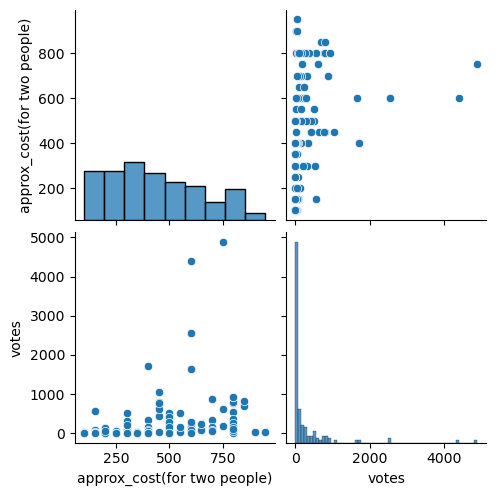

In [30]:
sns.pairplot(df[continous])
plt.show()

**for discrete Variable**

In [31]:
df[discrete_categorical].describe()

,name,online_order,book_table,listed_in(type),rating_category
count,148,148,148,148,148
unique,145,2,2,4,3
top,San Churro Cafe,No,No,Dining,Medium
freq,2,90,140,110,78


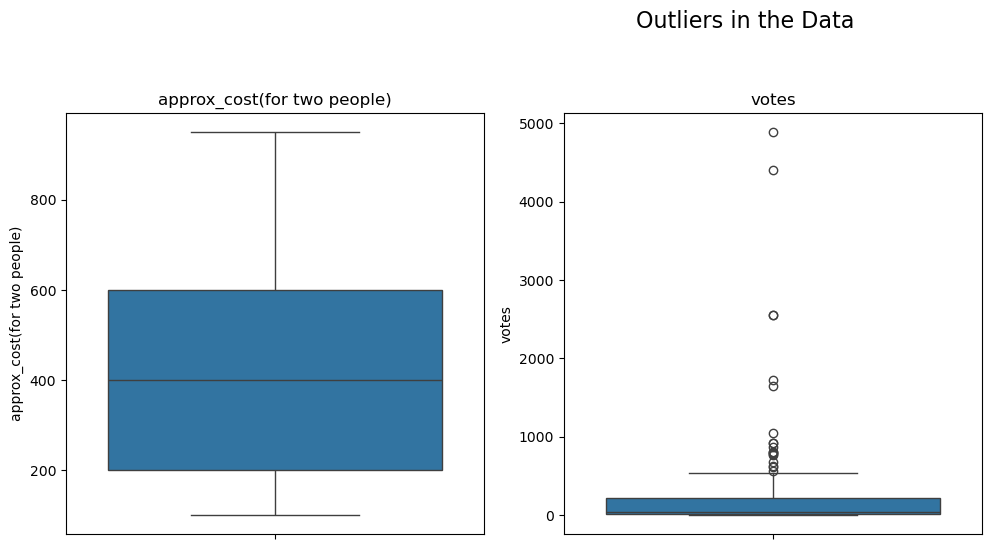

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))  # Adjust the figure size for better visualization

# Create a 2x3 grid of subplots
plt.subplot(2, 3, 1)
sns.boxplot(df["approx_cost(for two people)"])
plt.title("approx_cost(for two people)")

plt.subplot(2, 3, 2)
sns.boxplot(df["votes"])
plt.title("votes")

plt.suptitle("Outliers in the Data", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout and leave space for the title
plt.show()

DataFrame Columns: ['name', 'online_order', 'book_table', 'votes', 'approx_cost(for two people)', 'listed_in(type)', 'rating_category']


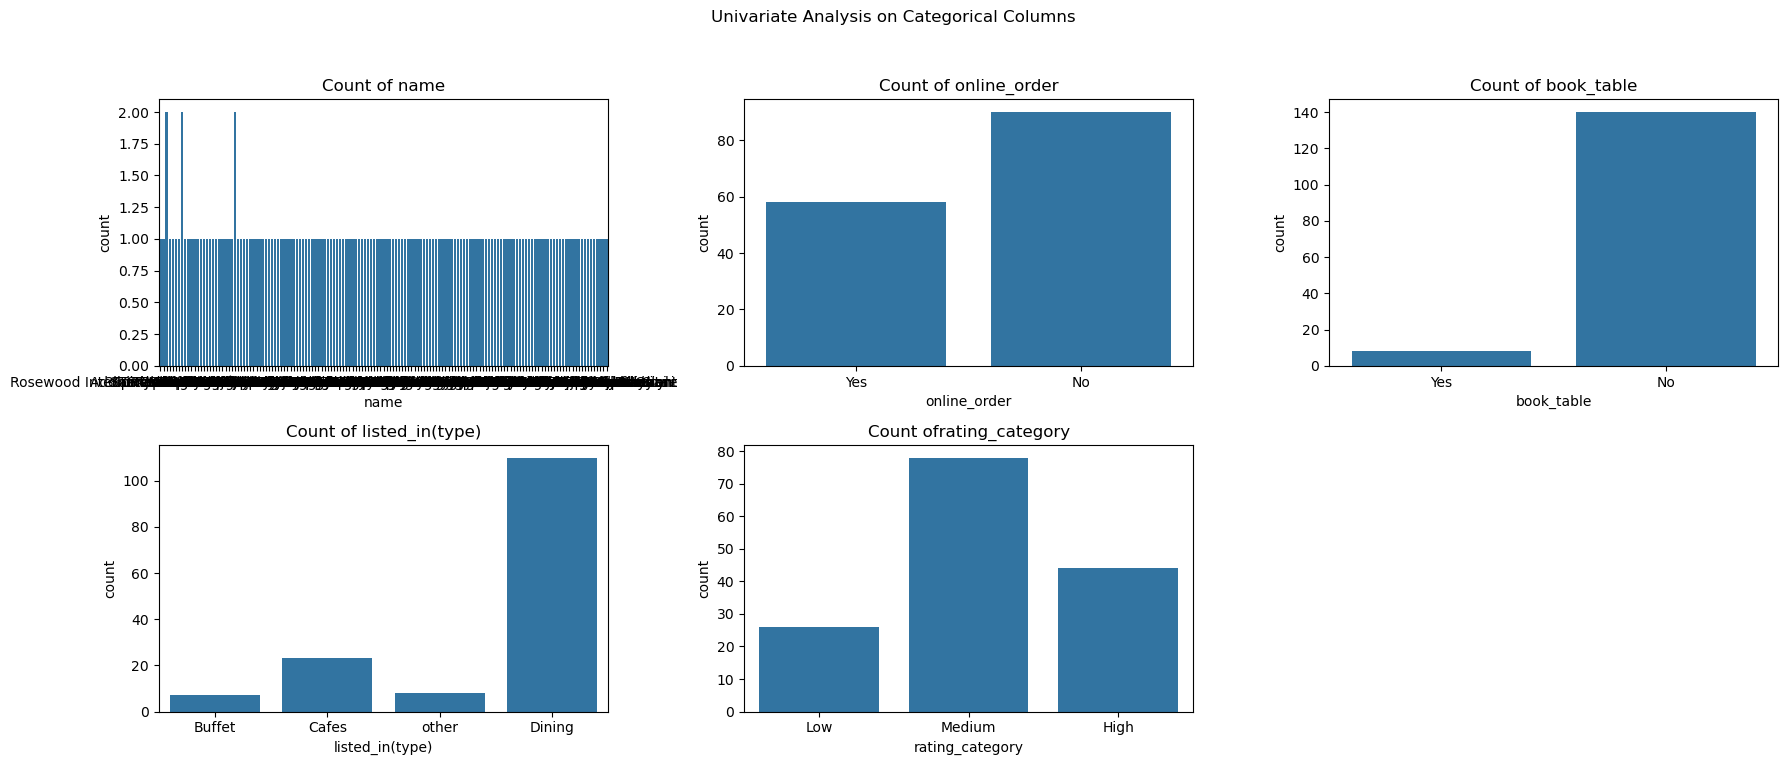

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame and contains the necessary categorical columns
# Load your DataFrame (example)
# df = pd.read_csv('your_data_file.csv')

# Check and clean column names
df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
print("DataFrame Columns:", df.columns.tolist())  # Print column names for verification

# Set figure size
plt.rcParams["figure.figsize"] = (18, 8)

# Create a subplot for each categorical column
plt.subplot(2, 3, 1)  # Position for the first plot
sns.countplot(x="name", data=df)
plt.title("Count of name")  # Title for the first plot

plt.subplot(2, 3, 2)  # Position for the second plot
sns.countplot(x="online_order", data=df)
plt.title("Count of online_order")  # Title for the second plot

plt.subplot(2, 3, 3)  # Position for the third plot
sns.countplot(x="book_table", data=df)
plt.title("Count of book_table")  # Title for the third plot

plt.subplot(2, 3, 4)  # Position for the fourth plot
sns.countplot(x="listed_in(type)", data=df)  # Make sure this name is correct
plt.title("Count of listed_in(type)")  # Title for the fourth plot

plt.subplot(2, 3, 5)  # Position for the fifth plot
sns.countplot(x="rating_category", data=df)
plt.title("Count ofrating_category")  # Title for the fifth plot

# Add a super title for all plots
plt.suptitle("Univariate Analysis on Categorical Columns")

# Display the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the super title
plt.show()


In [34]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
rating_category                0
dtype: int64

In [35]:
df.duplicated().sum()

0

In [36]:
df

,name,online_order,book_table,votes,approx_cost(for two people),listed_in(type),rating_category
0,Jalsa,Yes,Yes,775,800,Buffet,High
1,Spice Elephant,Yes,No,787,800,Buffet,High
2,San Churro Cafe,Yes,No,918,800,Buffet,Medium
3,Addhuri Udupi Bhojana,No,No,88,300,Buffet,Medium
4,Grand Village,No,No,166,600,Buffet,Medium
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,0,100,Dining,Medium
144,New Indraprasta,No,No,0,150,Dining,Medium
145,Anna Kuteera,Yes,No,771,450,Dining,High
146,Darbar,No,No,98,800,Dining,Low


In [37]:
df.to_excel("Cleaned_Zomato_Dataset.xlsx",index=False)
